In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import sys
sys.path.append('../scripts')  # Add the folder containing the script to the path
from engagement_clustering_analysis import aggregate_user_engagement_metrics, normalize_engagement_metrics
from extract_data import connect_to_db
from engagement_clustering_analysis import normalize_engagement_metrics, aggregate_user_engagement_metrics, k_means_clustering, cluster_statistics

In [24]:
df = connect_to_db()

# Check if data is loaded correctly
print(df.head())  # Check the first few rows of the data

# Aggregate user engagement metrics
engagement_metrics, top_10_frequency, top_10_duration, top_10_traffic = aggregate_user_engagement_metrics(df)

# Check if 'top_10_frequency' is populated correctly
print(top_10_frequency)  # Print to ensure it's not empty and contains the correct columns


        user_id handset_manufacturer                    handset_type  \
0  3.360100e+10               Huawei  Huawei P20 Lite Huawei Nova 3E   
1  3.360100e+10                Apple          Apple iPhone 7 (A1778)   
2  3.360100e+10            undefined                       undefined   
3  3.360101e+10                Apple         Apple iPhone 5S (A1457)   
4  3.360101e+10                Apple         Apple iPhone Se (A1723)   

   xdr_sessions  total_session_duration  total_download_data  \
0             1                116720.0         8.426375e+08   
1             1                181230.0         1.207552e+08   
2             1                134969.0         5.566597e+08   
3             1                 49878.0         4.019932e+08   
4             2                 37104.0         1.363130e+09   

   total_upload_data  social_media_volume  google_volume  email_volume  \
0         36053108.0            2232135.0      4389005.0     1331362.0   
1         36104459.0            26

In [26]:
# Aggregate the session frequency by user_id (MSISDN)
top_10_frequency = df.groupby('user_id')['xdr_sessions'].sum().reset_index()

# Sort by session frequency and select top 10
top_10_frequency = top_10_frequency.sort_values(by='xdr_sessions', ascending=False).head(10)

# Check the top_10_frequency DataFrame to ensure correct aggregation
print(top_10_frequency)


             user_id  xdr_sessions
13526   3.362632e+10            18
6437    3.361489e+10            17
13180   3.362578e+10            17
37052   3.365973e+10            16
76363   3.367588e+10            15
92923   3.376054e+10            15
65118   3.366716e+10            13
666     3.360313e+10            12
92577   3.376041e+10            12
106137  3.378632e+10            12


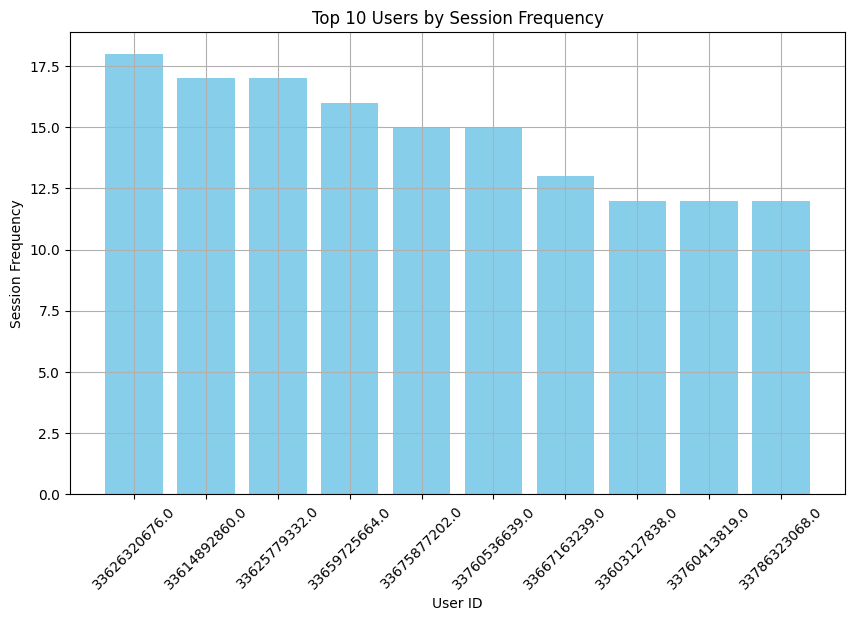

In [29]:

# Check if the DataFrame is not empty
if not top_10_frequency.empty:
    # Plot the top 10 users by session frequency
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_frequency['user_id'].astype(str), top_10_frequency['xdr_sessions'], color='skyblue')
    plt.xlabel('User ID')
    plt.ylabel('Session Frequency')
    plt.title('Top 10 Users by Session Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("top_10_frequency DataFrame is empty.")


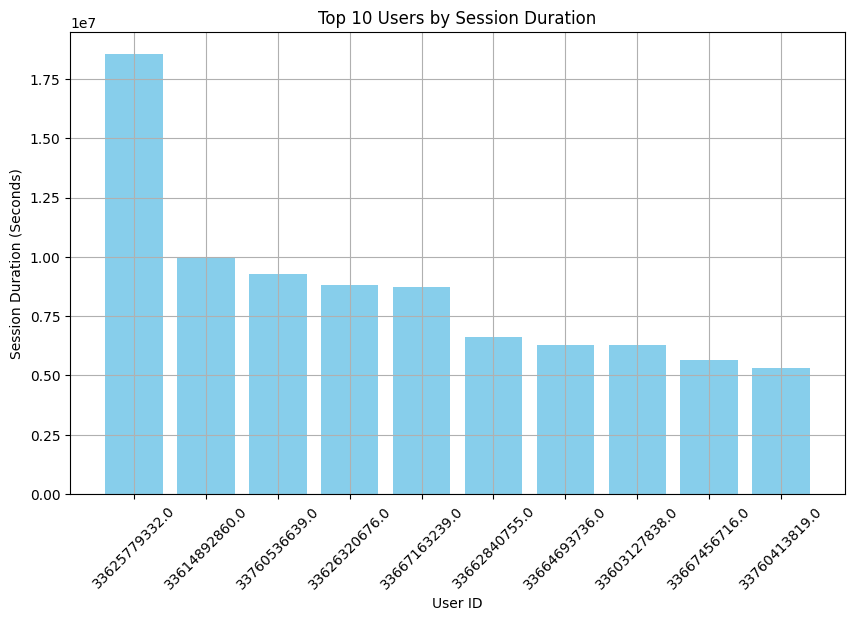

In [33]:

# Ensure 'user_id' is treated as a string for better plotting
top_10_duration['user_id'] = top_10_duration['user_id'].astype(str)

# Check if the DataFrame is not empty
if not top_10_duration.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_duration['user_id'], top_10_duration['session_duration'], color='skyblue')
    plt.xlabel('User ID')
    plt.ylabel('Session Duration (Seconds)')
    plt.title('Top 10 Users by Session Duration')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("top_10_duration DataFrame is empty.")


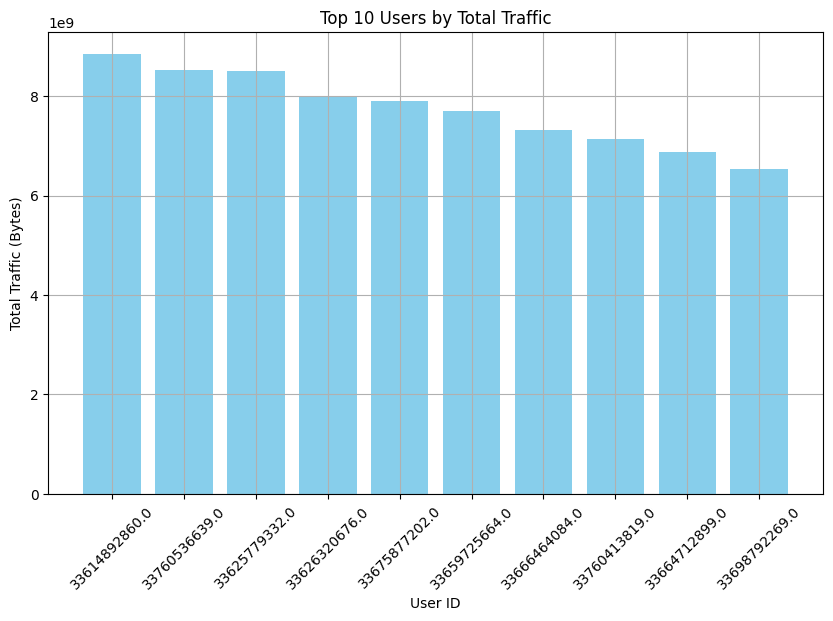

In [36]:

# Ensure 'user_id' is treated as a string for proper display
top_10_traffic['user_id'] = top_10_traffic['user_id'].astype(str)

# Check if the DataFrame is not empty
if not top_10_traffic.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_traffic['user_id'], top_10_traffic['total_traffic'], color='skyblue')
    plt.xlabel('User ID')
    plt.ylabel('Total Traffic (Bytes)')
    plt.title('Top 10 Users by Total Traffic')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("top_10_traffic DataFrame is empty.")


Silhouette Score for k=3: 0.5589088001075232


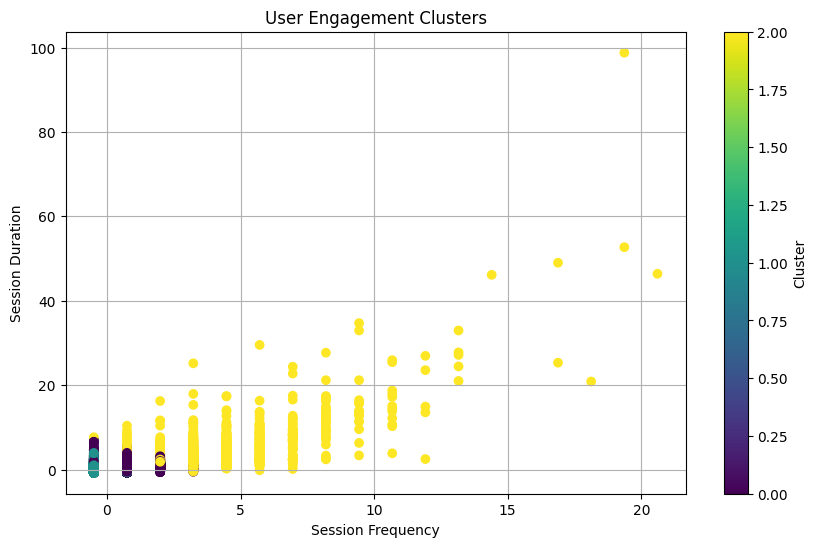

In [7]:
# Assuming 'df' is already loaded with your dataset
df = connect_to_db()
engagement_metrics, top_10_frequency, top_10_duration, top_10_traffic = aggregate_user_engagement_metrics(df)

# Normalize the engagement metrics
normalized_df = normalize_engagement_metrics(engagement_metrics)

# Apply k-means clustering and unpack the returned values
normalized_df, kmeans_model = k_means_clustering(normalized_df[['session_frequency', 'session_duration', 'total_traffic']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    normalized_df['session_frequency'],
    normalized_df['session_duration'],
    c=normalized_df['cluster'],
    cmap='viridis'
)
plt.xlabel('Session Frequency')
plt.ylabel('Session Duration')
plt.title('User Engagement Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


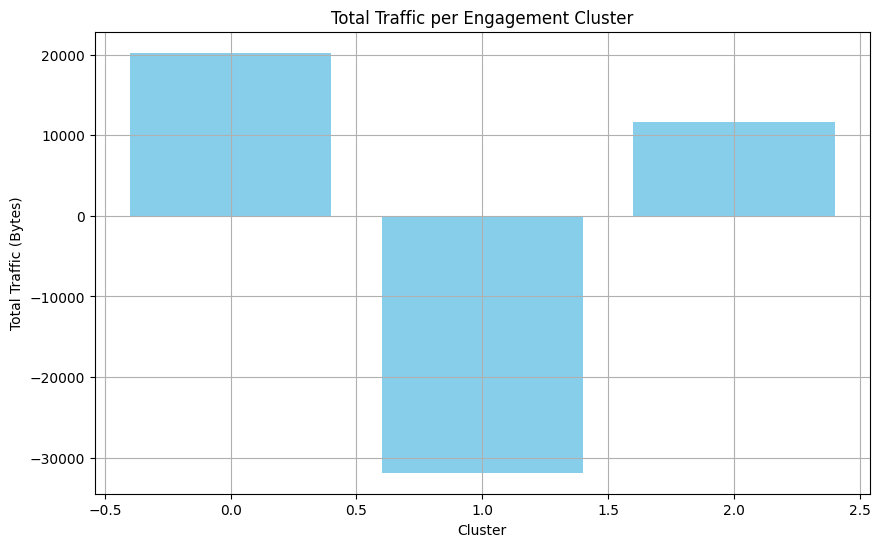

In [9]:
# Assuming 'normalized_df' contains the necessary data with 'cluster' and 'total_traffic'

# Calculate total traffic per cluster
cluster_stats = normalized_df.groupby('cluster')['total_traffic'].sum().reset_index()

# Plot the total traffic per engagement cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_stats['cluster'], cluster_stats['total_traffic'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Total Traffic per Engagement Cluster')
plt.grid(True)
plt.show()
